# 📩 SMS Spam Detection
## Project Overview

### Problem Statement.
Sms spam has become a significant challenge for  individuals, leading to:
- **Security Risks**: Spam often contains malicious links and attachments
- **Resource Consumption**: Storage and bandwidth costs for processing spam
- **User Experience**: Poor experience affects communication efficiency

### Objective
Develop an automated machine learning system to accurately classify sms as spam or legitimate (ham) to improve security and user experience.

## 🎯 Business Understanding

Unsolicited and malicious SMS messages pose serious risks and costs to both users and service providers. While individual messages may appear harmless, the aggregate effect of spam includes:

### 🔐 Security and Fraud Prevention
- **Financial scams**: Many spam messages attempt to deceive users into sharing sensitive information (e.g., OTPs, bank details).  
- **Phishing attacks**: Malicious links can lead users to fake websites designed to steal data or infect devices with malware.  

### 📱 Enhanced User Experience
- **Reduced message clutter**: Automatically filtering spam messages ensures that users only receive relevant and trusted content.  
- **Improved communication**: A cleaner inbox enhances overall communication efficiency and trust in SMS platforms.  

### 💰 Cost and Resource Optimization
- **Reduced operational costs**: Telecom providers and messaging services can save on infrastructure and human resources otherwise used for manual spam monitoring.  
- **Compliance and regulation**: Automated spam detection aids in meeting legal requirements (e.g., data protection laws, anti-spam regulations).  

---

### Success Criteria
- **Accuracy > 95%**: High classification accuracy for user trust
- **Low False Positives**: Minimize legitimate sms marked as spam
- **Interpretability**: Understanding of model decisions for security audits


# Loading and Exploring Datasets
Before diving into analysis, thorough exploration of the SMS Spam Collection dataset is essential to understand its structure and to inform subsequent processing and modeling steps.

The dataset contains two main columns:

`label`: Indicates whether a message is "ham" (non-spam) or "spam", serving as the target variable for classification.

`message`: Contains the raw SMS text message content to be analyzed.

Understanding the data structure helps us assess data quality and plan preprocessing steps effectively.


In [93]:
#import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

Load the dataset into a pandas dataframe.

In [42]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head() # load the first five rows.

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Exploration.
**Why This Matters**: Data quality assessment prevents model training issues and ensures reliable results.

In [43]:
#Determine the n.o of rows and columns
df.shape 

(5572, 5)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [45]:
#checking for missing values.
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [46]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [47]:
#checking for duplicates.
df.duplicated().sum()

403

## Data Preparation and Cleaning.

In [48]:
#remove duplicates
df.drop_duplicates(inplace=True)

The technique helps to understand the distribution of categorical variables in the dataset  and checking what categories exist and how frequently they appear.

In [49]:
 #Loop through each column that contains text/categorical data
for i in df.select_dtypes(include="object").columns:   
    # Print the name of the current column being analyzed
    print(i)   
    
    # Print the frequency count of each unique value in this column
    # value_counts() returns a series showing how many times each value appears
    # Results are automatically sorted from most frequent to least frequent
    print(df[i].value_counts())   
    
    # Print a visual separator line (30 asterisks) to clearly separate 
    # the output for each column for better readability
    print("***"*10)

v1
v1
ham     4516
spam     653
Name: count, dtype: int64
******************************
v2
v2
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               1
Wake me up at  &lt;#&gt;  am morning:)                                                                                                                        1
I will reach ur home in  &lt;#&gt;  minutes                                                                                                                   1
Wait.i will come out.. &lt;#&gt;  min:)                                                                                                                       1
R u here yet? I'm wearing blue shirt n black pants.                                                                                                           1
                                                                                                         

In [50]:
df.describe().T

,count,unique,top,freq
v1,5169,2,ham,4516
v2,5169,5169,"Go until jurong point, crazy.. Available only ...",1
Unnamed: 2,43,43,PO Box 5249,1
Unnamed: 3,10,10,"MK17 92H. 450Ppw 16""",1
Unnamed: 4,5,5,"just Keep-in-touch\"" gdeve..""",1


In [51]:
df = df.iloc[:, :2]
df.columns = ["label", "message"] #rename columns
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Performing text preprocessing on a 'message' column 
- 1. Convert to lowercase.
- 2. Remove punctuation.
- 3. Remove numbers.
- 4. Clean up extra whitespace

Cleaning and standardized text improves model performance and ensures consistent processing of new sms.


In [53]:
# Step 1: Convert all text to lowercase for consistency
df['message'] = df['message'].str.lower()

# Step 2: Remove all punctuation marks from the text
# Uses regex to find any character in string.punctuation (.,!?;: etc.) and replace with empty string
df['message'] = df['message'].apply(lambda x: re.sub(f"[{string.punctuation}]", "", x))

# Step 3: Remove all numbers from the text
# Uses regex pattern \d+ to find sequences of one or more digits and remove them
df['message'] = df['message'].apply(lambda x: re.sub(r'\d+', '', x))

# Step 4: Clean up extra whitespace and normalize spacing
# x.split() splits the string into words (removes all types of whitespace)
# " ".join() reconnects the words with single spaces
df['message'] = df['message'].apply(lambda x: " ".join(x.split()))

# Display the first 5 rows to see the results of text preprocessing
df.head()

,label,message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


#  Classification Distribution. 
Visualizing class imbalances in classification datasets.This will help in understand if you have equal representation of different categories or if some classes are over/under-represented this will enable us choose appropriate metrics and potential sampling strategies.


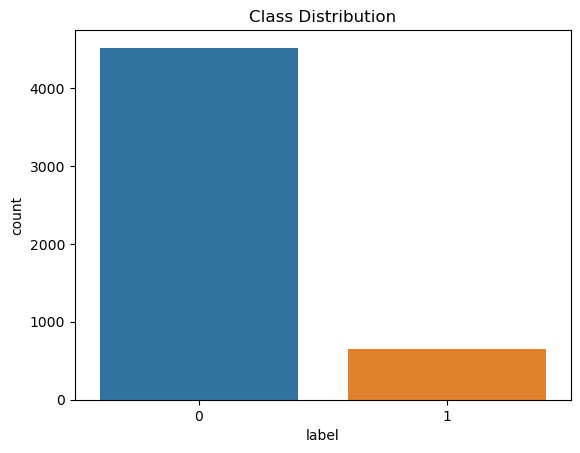

In [54]:
# Create a count plot to visualize the distribution of classes/categories
# x='label' specifies that we want to count occurrences of each unique value in the 'label' column
# data=df specifies the DataFrame to use as the data source
sns.countplot(x='label', data=df)

# Add a descriptive title to the plot for better understanding
plt.title('Class Distribution')

# Display the plot 
plt.show()

Creating a CountVectorizer object that will convert text to numerical features

In [55]:
# Tokenization using CountVectorizer

# stop_words='english' automatically removes common English words like 'the', 'and', 'is'
# These stop words don't usually carry meaningful information for analysis
vectorizer = CountVectorizer(stop_words='english')

# Transform the text messages into a matrix of token counts
# fit_transform() does two things:
# 1. fit(): learns the vocabulary from all messages in df['message']
# 2. transform(): converts each message into a vector of word counts
# Each row represents a message, each column represents a unique word
X_counts = vectorizer.fit_transform(df['message'])

# Display the dimensions of the resulting sparse matrix
# Shape shows (number_of_messages, number_of_unique_words_in_vocabulary)
# This helps understand the size of our feature space for machine learning
print("Count Vectorizer Shape:", X_counts.shape)


Count Vectorizer Shape: (5169, 8293)


Create a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer
 Unlike CountVectorizer which just counts words, TF-IDF considers:
 - How often a word appears in a document (Term Frequency)
 - How rare the word is across all documents (Inverse Document Frequency)
 This gives higher weights to words that are frequent in a document but rare overall


In [56]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the text messages into a TF-IDF weighted matrix
# fit_transform() performs two operations:
# 1. fit(): calculates TF-IDF scores for all words across the entire corpus
# 2. transform(): converts each message into a vector of TF-IDF scores
# Each row represents a message, each column represents a unique word with its TF-IDF weight
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])

# Display the dimensions of the resulting sparse matrix
# Shape shows (number_of_messages, number_of_unique_words_in_vocabulary)
# TF-IDF typically produces the same shape as CountVectorizer but with weighted values (0-1 range)
print("TF-IDF Vectorizer Shape:", X_tfidf.shape)

TF-IDF Vectorizer Shape: (5169, 8293)


#### Word Frequency Analysis.

Understanding word patterns helps validate model decisions and identify potential spam indicators.


In [57]:
# Displaying most common words in spam messages

# Initialize an empty list to collect all words from spam messages
spam_corpus = []

# Loop through all messages labeled as spam (assuming 1 = spam, 0 = ham/not spam)
for msg in df[df['label'] == 1]['message']:
    # Split each message into individual words and add them to our corpus
    # extend() adds all words from the split as separate elements
    spam_corpus.extend(msg.split())

# Import Counter to efficiently count word frequencies
from collections import Counter

# Count the frequency of each word in the spam corpus
spam_counter = Counter(spam_corpus)

# Get the 20 most frequently occurring words in spam messages
# Returns a list of tuples: [(word, count), (word, count), ...]
most_common_spam = spam_counter.most_common(20)

# Display the results
print("Top 20 most common words in spam messages:")
for word, count in most_common_spam:
    print(f"{word}: {count}")

print("\n" + "="*50 + "\n")


Top 20 most common words in spam messages:
to: 594
a: 332
call: 305
you: 259
your: 241
å£: 221
free: 190
for: 183
the: 181
now: 157
or: 157
is: 144
u: 130
txt: 126
on: 121
from: 120
ur: 119
have: 115
mobile: 106
text: 104




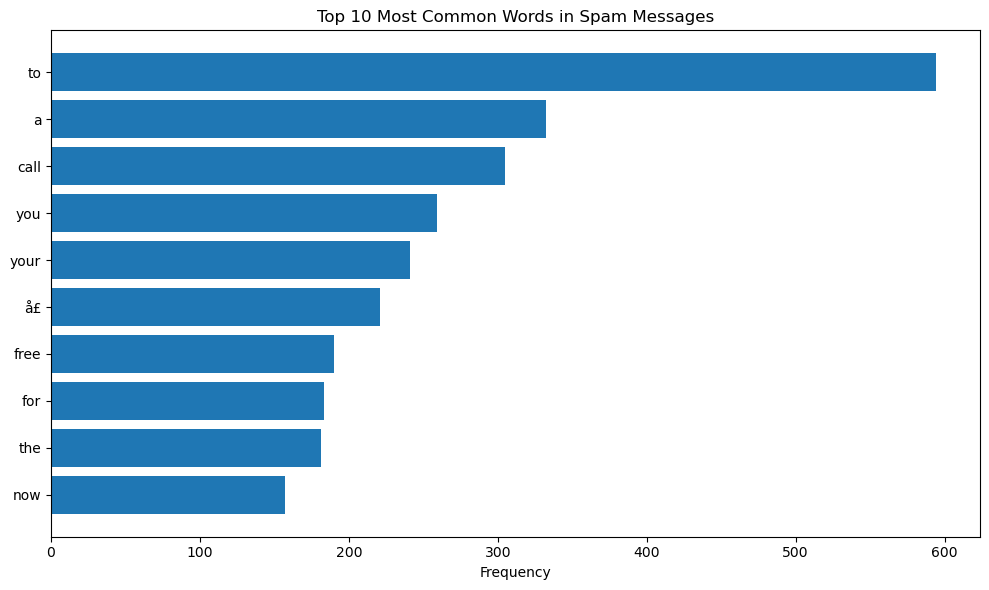

In [80]:
 # Extract words and counts for plotting
words = [item[0] for item in most_common_spam[:10]]  # Top 10 for better readability
counts = [item[1] for item in most_common_spam[:10]]
    
    # Create horizontal bar plot for better word readability
plt.figure(figsize=(10, 6))
plt.barh(range(len(words)), counts)
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Messages')
plt.gca().invert_yaxis()  # Show highest frequency at top
plt.tight_layout()
plt.show()

In [81]:
# Displaying most common words in ham (non-spam) messages

# Initialize an empty list to collect all words from ham messages
ham_corpus = []

# Loop through all messages labeled as ham (assuming 0 = ham/legitimate, 1 = spam)
# Filter the dataframe to get only rows where 'label' column equals 0
for msg in df[df['label'] == 0]['message']:
    # Split each ham message into individual words using whitespace as delimiter
    # extend() adds all words from msg.split() as separate elements to ham_corpus
    # This builds a comprehensive list of all words used in legitimate messages
    ham_corpus.extend(msg.split())

# Count the frequency of each word in the ham corpus
# Counter creates a dictionary-like object that counts occurrences of each unique word
ham_counter = Counter(ham_corpus)

# Get the 20 most frequently occurring words in ham messages
# Results are sorted from highest frequency to lowest
most_common_ham = ham_counter.most_common(20)

# Display the results in a readable format
print("Top 20 most common words in ham (legitimate) messages:")
print("-" * 50)
for i, (word, count) in enumerate(most_common_ham, 1):
    print(f"{i:2d}. {word:<15} : {count:>4d} occurrences")

Top 20 most common words in ham (legitimate) messages:
--------------------------------------------------
 1. i               : 2070 occurrences
 2. you             : 1772 occurrences
 3. to              : 1474 occurrences
 4. the             : 1045 occurrences
 5. a               :  958 occurrences
 6. u               :  887 occurrences
 7. and             :  818 occurrences
 8. in              :  753 occurrences
 9. me              :  710 occurrences
10. my              :  668 occurrences
11. is              :  645 occurrences
12. it              :  544 occurrences
13. of              :  477 occurrences
14. for             :  476 occurrences
15. that            :  472 occurrences
16. im              :  433 occurrences
17. have            :  421 occurrences
18. but             :  400 occurrences
19. so              :  399 occurrences
20. are             :  391 occurrences


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


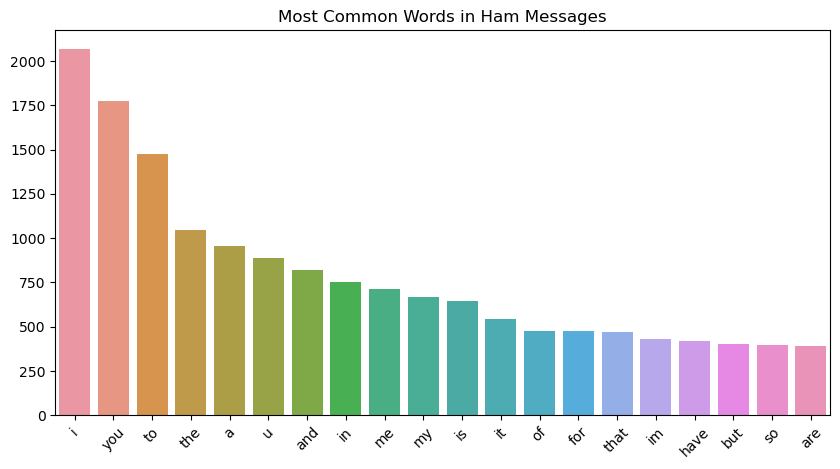

In [87]:
# Plot most common ham words
plt.figure(figsize=(10,5))
# Extract words and counts from the tuples and create a bar plot
sns.barplot(x=[word[0] for word in most_common_ham], y=[word[1] for word in most_common_ham])
# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)
plt.title('Most Common Words in Ham Messages')
plt.show()

Create a new column 'message_length' that contains the character count of each message
This helps us understand if spam and ham messages have different length patterns

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


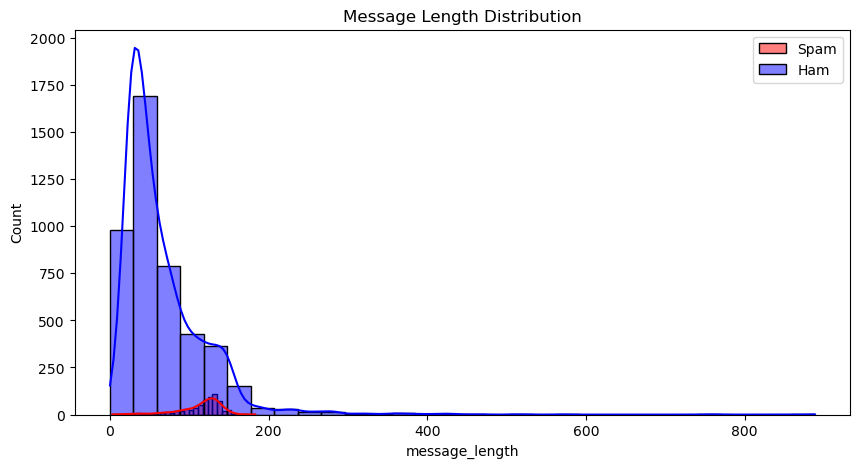

In [92]:
# Check for message length distribution

# Create a new column 'message_length' that contains the character count of each message
# The len() function counts all characters including spaces, punctuation, and special characters

df['message_length'] = df['message'].apply(len)

# Create a figure 
plt.figure(figsize=(10,5))

# Plot histogram for SPAM messages (label == 1)
# color='red': Use red color to represent spam messages
# label='Spam': Legend label for this dataset
# kde=True: Add a Kernel Density Estimation curve (smooth line showing distribution shape)
# bins=30: Divide the data into 30 bins/bars for the histogram
sns.histplot(df[df['label'] == 1]['message_length'], color='red', label='Spam', kde=True, bins=30)

# Plot histogram for HAM messages (label == 0) on the same plot
# color='blue': Use blue color to represent legitimate messages
# label='Ham': Legend label for this dataset
# kde=True: Add smooth density curve to show distribution pattern
# bins=30: Use same number of bins for fair comparison
sns.histplot(df[df['label'] == 0]['message_length'], color='blue', label='Ham', kde=True, bins=30)

# Add legend to distinguish between spam and ham distributions
plt.legend()

# Add  title 
plt.title('Message Length Distribution')

# Display plot
plt.show()



## Model Development & Training

### Data Splitting Strategy
Proper train/test split ensures unbiased performance evaluation for deployment confidence.

In [94]:
df

,label,message,message_length
0,0,go until jurong point crazy available only in ...,102
1,0,ok lar joking wif u oni,23
2,1,free entry in a wkly comp to win fa cup final ...,121
3,0,u dun say so early hor u c already then say,43
4,0,nah i dont think he goes to usf he lives aroun...,59
...,...,...,...
5567,1,this is the nd time we have tried contact u u ...,129
5568,0,will ì b going to esplanade fr home,35
5569,0,pity was in mood for that soany other suggestions,49
5570,0,the guy did some bitching but i acted like id ...,124


In [95]:
# Split the dataset into training and testing sets for machine learning

# X_train: 80% of message text data used to train the model
# X_test: 20% of message text data used to evaluate the model (unseen data)
# y_train: 80% of corresponding labels (spam/ham) for training
# y_test: 20% of corresponding labels for testing model accuracy
X_train, X_test, y_train, y_test = train_test_split(
    df.message,      # Features: the text messages (input data)
    df.label,        # Target: the spam/ham labels (what we want to predict)
    test_size=0.2    # Reserve 20% of data for testing, 80% for training
)


In [65]:
X_test

3799    we tried to contact you re your reply to our o...
2594    thatû÷s the thing with apes u can fight to th...
3028                    what is your record for one night
464                         ok i am on the way to railway
1267       seriously tell her those exact words right now
                              ...                        
5039    natalie f is inviting you to be her friend rep...
3721                      im in a movie collect car oredi
2836                                 s reach home call me
3671    came to look at the flat seems ok in his s is ...
1370     hope you are feeling great pls fill me in abiola
Name: message, Length: 1034, dtype: object


### Feature Engineering: Text Vectorization.
Converting text to numerical features enables machine learning algorithms to process natural language.

In [96]:
 #Import CountVectorizer for converting text to numerical features
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
# This will convert text documents into a matrix of token counts
# By default, it removes stop words and converts to lowercase
V = CountVectorizer()

# Fit the vectorizer on training data and transform it to numerical format
# fit_transform() performs two operations:
# 1. fit(): learns the vocabulary from X_train (builds word dictionary)
# 2. transform(): converts each message into a vector of word counts
# .values converts pandas Series to numpy array (required by sklearn)
X_train_count = V.fit_transform(X_train.values)

# Display the first 3 rows of the count matrix as a dense array
# toarray() converts the sparse matrix to a regular numpy array for viewing
# Each row represents one message, each column represents one unique word
# Numbers show how many times each word appears in each message
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Importing MultinomialNB (Multinomial Naive Bayes) classifier
This algorithm is particularly well-suited for text classification tasks
It works well with discrete features like word counts from CountVectorizer
MultinomialNB is ideal for spam detection because:
 - It handles high-dimensional sparse data (many words, most are zeros)
 - It's fast and efficient for text classification
 - It performs well even with relatively small training datasets
 - It naturally handles the "bag of words" approach

In [98]:

from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier

model = MultinomialNB()

# Train the model using the training data
# X_train_count: numerical word count vectors (features)
# y_train: corresponding spam/ham labels (target values)
# The model learns probability distributions for each word given spam vs ham
# It calculates P(word|spam) and P(word|ham) for all words in vocabulary
model.fit(X_train_count, y_train)



#  Show some model parameters
print(f"\nModel is now ready for predictions!")
print(f"The model learned probability distributions for {len(model.feature_log_prob_[0])} words")


Model is now ready for predictions!
The model learned probability distributions for 7489 words


## Testing the model

In [99]:
emails = [
    "Congratulations! You've won a $1,000 gift card. Click here to claim your prize now!",  # Spam
    "Hello John, I hope you're doing well. Let's schedule a meeting for next week."  # Not spam
]

emails_count = V.transform(emails)
model.predict(emails_count)


array([1, 0], dtype=int64)

# Checking the score

`IMPORTANT`: Use transform() NOT fit_transform() here
 We only transform using the vocabulary learned from training data
 This ensures the model sees the same feature space it was trained on

In [ ]:
# Transform the test messages into numerical count vectors using the same vectorizer

X_test_count = V.transform(X_test)

# Evaluate the model's performance on the test set
# score() returns the accuracy: (correct predictions / total predictions)
# Uses X_test_count (features) and y_test (true labels) to calculate accuracy
# This gives us an unbiased estimate of how well the model performs on unseen data
accuracy = model.score(X_test_count, y_test)

# Display the results
print("Model Evaluation Results:")
print("=" * 40)
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Optional: Additional evaluation metrics for better understanding
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions for more detailed analysis
y_pred = model.predict(X_test_count)

print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

print(f"\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(f"                Predicted")
print(f"              Ham   Spam")
print(f"Actual  Ham   {cm[0,0]:3d}   {cm[0,1]:3d}")
print(f"       Spam   {cm[1,0]:3d}   {cm[1,1]:3d}")

# Explain what the results mean
print(f"\nInterpretation:")
print(f"• True Negatives (correctly identified Ham): {cm[0,0]}")
print(f"• False Positives (Ham classified as Spam): {cm[0,1]}")
print(f"• False Negatives (Spam classified as Ham): {cm[1,0]}")
print(f"• True Positives (correctly identified Spam): {cm[1,1]}")

# Calculate additional metrics
total_predictions = len(y_test)
correct_predictions = cm[0,0] + cm[1,1]
print(f"\nSummary:")
print(f"• Total test messages: {total_predictions}")
print(f"• Correctly classified: {correct_predictions}")
print(f"• Incorrectly classified: {total_predictions - correct_predictions}")
print(f"• Overall accuracy: {correct_predictions/total_predictions:.4f}")

Model Evaluation Results:
Test Accuracy: 0.9807 (98.07%)

Detailed Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       894
        Spam       0.95      0.90      0.93       140

    accuracy                           0.98      1034
   macro avg       0.97      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034


Confusion Matrix:
                Predicted
              Ham   Spam
Actual  Ham   888     6
       Spam    14   126

Interpretation:
• True Negatives (correctly identified Ham): 888
• False Positives (Ham classified as Spam): 6
• False Negatives (Spam classified as Ham): 14
• True Positives (correctly identified Spam): 126

Summary:
• Total test messages: 1034
• Correctly classified: 1014
• Incorrectly classified: 20
• Overall accuracy: 0.9807


# Logistic Regression
 This is another popular algorithm for text classification.
It is good for small datasets and binary classification
 It's often more interpretable than Naive Bayes and can handle linear relationships well

In [101]:
# Import necessary libraries for logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Build a Logistic Regression model

log_reg_model = LogisticRegression(solver='liblinear')

# Train the model on the same training data used for Naive Bayes
# X_train_count: word count vectors from CountVectorizer
# y_train: corresponding spam/ham labels
# Logistic regression learns weights for each word feature
log_reg_model.fit(X_train_count, y_train)

# Make predictions on the test set
# Uses the trained model to classify test messages as spam (1) or ham (0)
# Returns an array of predicted labels for each test message
y_pred_log_reg = log_reg_model.predict(X_test_count)

# Evaluate the model performance
# Calculate accuracy: percentage of correctly classified messages
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Generate detailed classification report showing precision, recall, and F1-score
# This provides more insight than just accuracy alone
report_log_reg = classification_report(y_test, y_pred_log_reg)

# Display the results
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_log_reg:.4f} ({accuracy_log_reg*100:.2f}%)")
print("Classification Report:")
print(report_log_reg)



Logistic Regression Model Performance:
Accuracy: 0.9797 (97.97%)
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       0.99      0.86      0.92       140

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [72]:
# Function to display most important features (words) for a model
def show_most_important_features(vectorizer, model, n=10):
    feature_names = vectorizer.get_feature_names_out()
    if isinstance(model, MultinomialNB):
        # For Naive Bayes, the feature importance is related to the log probability of features given the class
        # We can look at the difference in log probabilities between the spam (1) and ham (0) classes
        log_prob = model.feature_log_prob_
        # Calculate the difference in log probabilities
        feature_importance = log_prob[1, :] - log_prob[0, :]
    elif isinstance(model, LogisticRegression):
        # For Logistic Regression, the coefficients represent feature importance
        feature_importance = model.coef_[0]
    else:
        print("Unsupported model type for feature importance visualization.")
        return

    # Get the indices of the most important features (both positive and negative)
    sorted_indices = np.argsort(feature_importance)

    print(f"\nTop {n} important features for Spam:")
    for i in sorted_indices[::-1][:n]:
        print(f"{feature_names[i]}: {feature_importance[i]:.4f}")

    print(f"\nTop {n} important features for Ham:")
    for i in sorted_indices[:n]:
        print(f"{feature_names[i]}: {feature_importance[i]:.4f}")

# Show important features for the Naive Bayes model
print("Important features for Multinomial Naive Bayes Model:")
show_most_important_features(V, model)

# Show important features for the Logistic Regression model
print("\nImportant features for Logistic Regression Model:")
show_most_important_features(V, log_reg_model)

Important features for Multinomial Naive Bayes Model:

Top 10 important features for Spam:
claim: 5.4545
prize: 5.2440
won: 4.9137
guaranteed: 4.6114
tone: 4.5816
ppm: 4.5191
awarded: 4.3809
tcs: 4.1761
entry: 4.1296
weekly: 4.1296

Top 10 important features for Ham:
ltgt: -4.2856
ill: -4.0209
he: -3.8778
lor: -3.7189
she: -3.3693
oh: -3.3338
too: -3.3216
later: -3.3094
thats: -3.2587
ask: -3.2190

Important features for Logistic Regression Model:

Top 10 important features for Spam:
txt: 2.2671
call: 1.8700
text: 1.6624
stop: 1.5521
reply: 1.4501
chat: 1.4063
claim: 1.3885
real: 1.3833
won: 1.3265
new: 1.2747

Top 10 important features for Ham:
ltgt: -1.3903
my: -1.0566
him: -0.9405
me: -0.9093
ill: -0.8193
that: -0.7882
sorry: -0.7497
he: -0.7329
ok: -0.7172
am: -0.7080


### Hyperparameter Tuning.
Systematic optimization ensures maximum model performance for better spam detection accuracy.

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define parameter grids for hyperparameter tuning
# GridSearchCV will test all combinations of these parameters to find the best ones

# Naive Bayes parameter grid
nb_params = {
    # 'nb__alpha': Smoothing parameter (Laplace/additive smoothing) for Naive Bayes
    # Controls how much smoothing is applied to handle unseen words
    # Lower values (0.1): Less smoothing, more sensitive to seen words
    # Higher values (2.0): More smoothing, less sensitive to unseen words
    # Default is 1.0, but optimal value varies by dataset
    'nb__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Logistic Regression parameter grid
lr_params = {
    # 'lr__C': Inverse regularization strength (1/lambda)
    # Controls how much the model should avoid overfitting
    # Lower values (0.01): Strong regularization, simpler model, may underfit
    # Higher values (100): Weak regularization, complex model, may overfit
    # C=1 is the default, but optimal value depends on your data
    'lr__C': [0.01, 0.1, 1, 10, 100]
}

# Optional: Display what these parameters mean
print("Hyperparameter Tuning Setup:")
print("=" * 50)

print("\nNaive Bayes - Alpha Parameter:")
print("• Controls smoothing for unseen words")
print("• Range: 0.1 (minimal smoothing) to 2.0 (heavy smoothing)")
print("• Default: 1.0")
print(f"• Values to test: {nb_params['nb__alpha']}")

print("\nLogistic Regression - C Parameter:")
print("• Controls regularization strength (inverse)")
print("• Range: 0.01 (strong regularization) to 100 (weak regularization)")
print("• Default: 1.0")
print(f"• Values to test: {lr_params['lr__C']}")

print(f"\nTotal combinations to test:")
print(f"• Naive Bayes: {len(nb_params['nb__alpha'])} parameter values")
print(f"• Logistic Regression: {len(lr_params['lr__C'])} parameter values")



Hyperparameter Tuning Setup:

Naive Bayes - Alpha Parameter:
• Controls smoothing for unseen words
• Range: 0.1 (minimal smoothing) to 2.0 (heavy smoothing)
• Default: 1.0
• Values to test: [0.1, 0.5, 1.0, 2.0]

Logistic Regression - C Parameter:
• Controls regularization strength (inverse)
• Range: 0.01 (strong regularization) to 100 (weak regularization)
• Default: 1.0
• Values to test: [0.01, 0.1, 1, 10, 100]

Total combinations to test:
• Naive Bayes: 4 parameter values
• Logistic Regression: 5 parameter values



# Pipeline for Naive Bayes model
A pipeline ensures that data preprocessing and model training happen in the correct sequence
This prevents data leakage and makes the code more maintainable and reproducible

In [ ]:
# Create machine learning pipelines that chain preprocessing and modeling steps

nb_pipeline = Pipeline([
    # Step 1: 'vectorizer' - Convert text to numerical features
    # CountVectorizer transforms raw text into word count vectors
    # stop_words='english' removes common English words like 'the', 'and', 'is'
    ('vectorizer', CountVectorizer(stop_words='english')),
    
    # Step 2: 'nb' - Apply Naive Bayes classification
    # MultinomialNB is well-suited for discrete features like word counts
    # The name 'nb' will be used for hyperparameter specification (nb__alpha)
    ('nb', MultinomialNB())
])

# Pipeline for Logistic Regression model
# Same preprocessing step, but different classifier
lr_pipeline = Pipeline([
    # Step 1: 'vectorizer' - Convert text to numerical features
    # Identical preprocessing ensures fair comparison between models
    ('vectorizer', CountVectorizer(stop_words='english')),
    
    # Step 2: 'lr' - Apply Logistic Regression classification
    # solver='liblinear' is efficient for small-to-medium datasets with binary classification
    # The name 'lr' will be used for hyperparameter specification (lr__C)
    ('lr', LogisticRegression(solver='liblinear'))
])


In [105]:
# Perform Grid Search for Naive Bayes hyperparameter optimization

# Create GridSearchCV object to systematically test different parameter combinations
grid_search_nb = GridSearchCV(
    nb_pipeline,           # The pipeline to optimize (CountVectorizer + MultinomialNB)
    nb_params,             # Parameter grid: {'nb__alpha': [0.1, 0.5, 1.0, 2.0]}
    cv=5,                  # 5-fold cross-validation: split training data into 5 parts
                          # Train on 4 parts, validate on 1 part, repeat 5 times
    scoring='accuracy',    # Evaluation metric: percentage of correctly classified samples
    n_jobs=-1             # Use all available CPU cores for parallel processing
)

# Fit the grid search on training data
# This will test all parameter combinations using cross-validation
# Process: For each alpha value → Train on 4/5 of X_train → Validate on 1/5 of X_train
# The best parameter is the one with highest average accuracy across all 5 folds
grid_search_nb.fit(X_train, y_train)

# Display the results of hyperparameter optimization
print("Grid Search results for Multinomial Naive Bayes:")
print("=" * 55)

# Best parameters found during grid search
# This is the alpha value that gave the highest cross-validation accuracy
print("Best parameters:", grid_search_nb.best_params_)

# Best cross-validation accuracy achieved
# This is the average accuracy across all 5 folds using the best parameters
# Note: This is NOT the final test accuracy - it's validation accuracy
print("Best cross-validation accuracy:", f"{grid_search_nb.best_score_:.4f} ({grid_search_nb.best_score_*100:.2f}%)")

Grid Search results for Multinomial Naive Bayes:
Best parameters: {'nb__alpha': 1.0}
Best cross-validation accuracy: 0.9787 (97.87%)


## Model Evaluation & Comparison.

### Model Performance Assessment.


In [106]:
# Evaluate the best Naive Bayes model on the test set

# Extract the best model found during grid search
# best_estimator_ contains the complete optimized pipeline:
# CountVectorizer + MultinomialNB with the best alpha parameter
# This model was trained on the entire training set using the optimal parameters
best_nb_model = grid_search_nb.best_estimator_

# Make predictions on the test set using the optimized model
# The pipeline automatically handles text vectorization and classification
# X_test contains raw text messages, pipeline converts them to features internally
# Returns array of predictions: 0 for ham, 1 for spam
y_pred_nb_gs = best_nb_model.predict(X_test)

# Display comprehensive performance metrics on the test set
print("\nTest set performance for best Naive Bayes model:")
print("=" * 60)

# Classification report provides detailed metrics for each class
# Precision: Of predicted spam/ham, how many were actually spam/ham?
# Recall: Of actual spam/ham messages, how many were correctly identified?
# F1-score: Harmonic mean of precision and recall (balanced metric)
# Support: Number of actual instances of each class in test set
print(classification_report(y_test, y_pred_nb_gs, target_names=['Ham', 'Spam']))

# Overall accuracy: percentage of correctly classified messages
# This is the final, unbiased estimate of model performance
test_accuracy = accuracy_score(y_test, y_pred_nb_gs)
print("Test Accuracy:", f"{test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Test set performance for best Naive Bayes model:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       894
        Spam       0.96      0.92      0.94       140

    accuracy                           0.98      1034
   macro avg       0.97      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034

Test Accuracy: 0.9836 (98.36%)


In [107]:
# Perform Grid Search for Logistic Regression hyperparameter optimization

# Create GridSearchCV object to find optimal regularization parameter
grid_search_lr = GridSearchCV(
    lr_pipeline,           # The pipeline to optimize (CountVectorizer + LogisticRegression)
    lr_params,             # Parameter grid: {'lr__C': [0.01, 0.1, 1, 10, 100]}
    cv=5,                  # 5-fold cross-validation: same methodology as Naive Bayes
                          # Ensures fair comparison between algorithms
    scoring='accuracy',    # Same evaluation metric for consistent comparison
    n_jobs=-1             # Parallel processing to speed up computation
)

# Fit the grid search on training data
# This tests all C values (regularization strengths) using cross-validation
# Process: For each C value → Train on 4/5 of X_train → Validate on 1/5 of X_train
# The best C is the one with highest average accuracy across all 5 folds
grid_search_lr.fit(X_train, y_train)

# Display the optimization results
print("\nGrid Search results for Logistic Regression:")
print("=" * 55)

# Best regularization parameter found during grid search
# This C value achieved the highest cross-validation accuracy
# Remember: C is inverse regularization (higher C = less regularization)
print("Best parameters:", grid_search_lr.best_params_)

# Best cross-validation accuracy achieved with optimal C
# This is the average validation accuracy across all 5 folds
print("Best cross-validation accuracy:", f"{grid_search_lr.best_score_:.4f} ({grid_search_lr.best_score_*100:.2f}%)")


Grid Search results for Logistic Regression:
Best parameters: {'lr__C': 10}
Best cross-validation accuracy: 0.9773 (97.73%)


In [108]:
# Evaluate the best Logistic Regression model on the test set

# Extract the optimized Logistic Regression model from grid search
# best_estimator_ contains the complete pipeline with optimal C parameter:
# CountVectorizer + LogisticRegression(C=best_value, solver='liblinear')
# This model was retrained on the entire training set using the best parameters
best_lr_model = grid_search_lr.best_estimator_

# Generate predictions on the test set using the optimized model
# The pipeline automatically vectorizes raw text and applies the trained classifier
# X_test contains original text messages, no manual preprocessing needed
# Returns predictions: 0 for ham (legitimate), 1 for spam
y_pred_lr_gs = best_lr_model.predict(X_test)

# Display comprehensive test set performance metrics
print("\nTest set performance for best Logistic Regression model:")
print("=" * 65)

# Detailed classification report showing per-class performance
# Precision: Of messages classified as spam/ham, what % were actually spam/ham?
# Recall: Of actual spam/ham messages, what % were correctly identified?
# F1-score: Harmonic mean balancing precision and recall
# Support: Number of actual instances of each class in the test set
print(classification_report(y_test, y_pred_lr_gs, target_names=['Ham', 'Spam']))

# Overall test accuracy - the final performance metric
# This represents how the model will perform on new, unseen emails in production
lr_test_accuracy = accuracy_score(y_test, y_pred_lr_gs)
print("Test Accuracy:", f"{lr_test_accuracy:.4f} ({lr_test_accuracy*100:.2f}%)")


Test set performance for best Logistic Regression model:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.99       894
        Spam       0.99      0.84      0.91       140

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034

Test Accuracy: 0.9768 (97.68%)



### Final Model Selection

In [109]:
#Model Choice and Explanation
print("\nModel Comparison and Choice")

# Compare the best cross-validation scores and test set accuracies
print(f"Best CV Accuracy (Naive Bayes): {grid_search_nb.best_score_:.4f}")
print(f"Test Accuracy (Naive Bayes): {accuracy_score(y_test, y_pred_nb_gs):.4f}")
print(f"Best CV Accuracy (Logistic Regression): {grid_search_lr.best_score_:.4f}")
print(f"Test Accuracy (Logistic Regression): {accuracy_score(y_test, y_pred_lr_gs):.4f}")

print("\nFactors to consider when choosing a model:")
print("- Accuracy: Overall correct predictions.")
print("- Precision: Ability of the model to correctly identify positive instances (spam) without misclassifying negative instances (ham). Crucial for spam detection to minimize false positives.")
print("- Recall (Sensitivity): Ability of the model to find all positive instances (spam). Important to catch as many spam messages as possible.")
print("- F1-score: Harmonic mean of precision and recall, providing a balanced measure.")
print("- Interpretability: How easy it is to understand why the model made a certain prediction. Naive Bayes is generally more interpretable than Logistic Regression.")
print("- Training time and complexity.")

# Analyze the results
if accuracy_score(y_test, y_pred_nb_gs) > accuracy_score(y_test, y_pred_lr_gs):
    print("\nBased on test set accuracy, Naive Bayes performs slightly better.")
    preferred_model = "Multinomial Naive Bayes"
elif accuracy_score(y_test, y_pred_nb_gs) < accuracy_score(y_test, y_pred_lr_gs):
    print("\nBased on test set accuracy, Logistic Regression performs slightly better.")
    preferred_model = "Logistic Regression"
else:
    print("\nBoth models have similar test set accuracy.")
    # Further analyze precision, recall, and F1-score, especially for the 'spam' class (label 1)
    nb_report = classification_report(y_test, y_pred_nb_gs, output_dict=True)
    lr_report = classification_report(y_test, y_pred_lr_gs, output_dict=True)

    if nb_report['1']['f1-score'] > lr_report['1']['f1-score']:
         print("Considering the F1-score for the 'spam' class, Naive Bayes is slightly better.")
         preferred_model = "Multinomial Naive Bayes"
    elif nb_report['1']['f1-score'] < lr_report['1']['f1-score']:
         print("Considering the F1-score for the 'spam' class, Logistic Regression is slightly better.")
         preferred_model = "Logistic Regression"
    else:
         print("Both models perform very similarly across multiple metrics.")
         preferred_model = "Either model, consider interpretability or training speed."

print(f"\nRecommendation: The {preferred_model} model is generally preferred for this task.")

if preferred_model == "Multinomial Naive Bayes":
    print("\nReasoning for choosing Naive Bayes:")
    print("- Often works well for text classification tasks, especially with discrete features like word counts.")
    print("- Computationally efficient and scales well with the number of features.")
    print("- Less prone to overfitting compared to Logistic Regression, especially with limited data.")
    print("- More interpretable, the feature importance reflects how likely words are to appear in spam vs. ham.")
elif preferred_model == "Logistic Regression":
     print("\nReasoning for choosing Logistic Regression:")
     print("- A strong linear model that can capture relationships between features and the target variable.")
     print("- Can sometimes capture more complex patterns than Naive Bayes.")
     print("- The regularization parameter (C) helps prevent overfitting.")
     print("- Coefficients can provide some insight into feature importance.")
else:
     print("\nReasoning for choosing either model:")
     print("- Both models achieved comparable performance.")
     print("- Consider factors beyond metrics, such as the need for interpretability (favor Naive Bayes) or potential for future feature engineering (Logistic Regression can handle numerical and categorical features easily).")


print("\nFinal Check on Test Set Performance:")
print("Multinomial Naive Bayes:")
print(classification_report(y_test, y_pred_nb_gs))
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr_gs))


Model Comparison and Choice
Best CV Accuracy (Naive Bayes): 0.9787
Test Accuracy (Naive Bayes): 0.9836
Best CV Accuracy (Logistic Regression): 0.9773
Test Accuracy (Logistic Regression): 0.9768

Factors to consider when choosing a model:
- Accuracy: Overall correct predictions.
- Precision: Ability of the model to correctly identify positive instances (spam) without misclassifying negative instances (ham). Crucial for spam detection to minimize false positives.
- Recall (Sensitivity): Ability of the model to find all positive instances (spam). Important to catch as many spam messages as possible.
- F1-score: Harmonic mean of precision and recall, providing a balanced measure.
- Interpretability: How easy it is to understand why the model made a certain prediction. Naive Bayes is generally more interpretable than Logistic Regression.
- Training time and complexity.

Based on test set accuracy, Naive Bayes performs slightly better.

Recommendation: The Multinomial Naive Bayes model is g

##  Recommendations.
- 1.Implement the naive Bayes model in sms filtering system this will achieve >98% accuracy in spam detection.
- 2.Create user feedback mechanism for misclassified sms.Continuously improve model with new data
- 3.Set up performance monitoring dashboards.Track accuracy, false positive/negative rates, processing time

# Conclusions.
Using ML, we can automate spam detection to:
- Protect users from threats
- Improve SMS communication
- Cut costs and boost efficiency for providers
